Copyright 2022 Andrew M. Olney and made available under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0) for text and [Apache-2.0](http://www.apache.org/licenses/LICENSE-2.0) for code.


# Plotting: Problem solving

In this notebook we'll look at the `cereal` dataset, which consists mostly of nutrition information along with some other properties:

| Variable | Type | Description |
|:-------|:-------|:-------|
| name     | Nominal | Name of cereal (an ID)                                                                                                                          |
| mfr      | Nominal | Manufacturer of cereal: (A)merican Home Food Products; (G)eneral Mills; (K)elloggs; (N)abisco; (P)ost; (Q)uaker Oats; (R)alston Purina |
| type     | Nominal | (H)ot or (C)old                                                                                                                        |
| calories | Ratio   | calories per serving                                                                                                                   |
| protein  | Ratio   | grams of protein                                                                                                                       |
| fat      | Ratio   | grams of fat                                                                                                                           |
| sodium   | Ratio   | milligrams of sodium                                                                                                                   |
| fiber    | Ratio   | grams of dietary fiber                                                                                                                 |
| carbo    | Ratio   | grams of complex carbohydrates                                                                                                         |
| sugars   | Ratio   | grams of sugars                                                                                                                        |
| potass   | Ratio   | milligrams of potassium                                                                                                                |
| vitamins | Ordinal | vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended                                            |
| shelf    | Ratio   | display shelf (1, 2, or 3, counting from the floor)                                                                                    |
| weight   | Ratio   | weight in ounces of one serving                                                                                                        |
| cups     | Ratio   | number of cups in one serving                                                                                                          |
| rating   | Ratio   | a rating of the cereals (Possibly from Consumer Reports?)                                                                              |
      
<div style="text-align:center;font-size: smaller">
    <b>Source:</b> This dataset was taken from <a href="https://www.kaggle.com/crawford/80-cereals">Kaggle</a>.
</div>
<br>

## Import libraries

We need to load our data into a dataframe and do some plots, so import `pandas` and `plotly.express` below.

In [4]:
import plotly.express as px
import pandas as pd

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable><variable id="4+hh5$`7la4poj}NThGb">pd</variable></variables><block type="importAs" id="JKd}DIrGfV*IelKZ!4ls" x="129" y="219"><field name="libraryName">plotly.express</field><field name="VAR" id="+yh,Zg{hON]zy6D~.rH#">px</field><next><block type="importAs" id="ml;eEF_WY:%m)CrF]n=F"><field name="libraryName">pandas</field><field name="VAR" id="4+hh5$`7la4poj}NThGb">pd</field></block></next></block></xml>

<!-- We will cover plotting and reading the following data visualizations in `plotly`:

- scatter plots 
- line graphs
- bar charts
- box plots
- plots for distributions (histograms and density plots)

We will specifically use the `plotly.express` library for quick and easy plotting. 

Keep in mind: some of the same plots can be done `plotly.graph_objs` and `plotly.figure_factory`. These libraries also allow for additional (and more complicated) plots or have additional flexibility.  -->

## Load data

Load `"datasets/cereal.csv"` into a dataframe and display the dataframe.

In [8]:
dataframe = pd.read_csv('datasets/cereal.csv')

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="1m+6=s7NsBC*q3sFfiW%">dataframe</variable><variable id="4+hh5$`7la4poj}NThGb">pd</variable></variables><block type="variables_set" id="eM|rNiy,R{-p1p$dVAR6" x="0" y="0"><field name="VAR" id="1m+6=s7NsBC*q3sFfiW%">dataframe</field><value name="VALUE"><block type="varDoMethod" id=".?df*Uxa+7wJ725Tdbys"><mutation items="1"></mutation><field name="VAR" id="4+hh5$`7la4poj}NThGb">pd</field><field name="MEMBER">read_csv</field><data>pd:read_csv</data><value name="ADD0"><block type="text" id="BmGeXu-tK(kl.et,@l=H"><field name="TEXT">datasets/cereal.csv</field></block></value></block></value></block><block type="variables_get" id="91r[]xd;.mrehlB8@4Gm" x="61" y="66"><field name="VAR" id="1m+6=s7NsBC*q3sFfiW%">dataframe</field></block></xml>

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


## Research questions

Any plot you make should be designed to address a question.
At this point, we're **not making a statistical/quantitative argument** but rather a qualitative one.

Here are some possible/plausible questions. 
For each one, think about the type of plot that might make the most sense.
Then open up the dropdown to see the plot we're going to do.
If you think we're choosing wrong, bring it up for discussion!

#### Do fat and sugar go together?

We might expect that fatty cereals have a lot of sugar and vice versa.
What would be a good plot?

<details>
  <summary>Answer</summary>
  
  Since both variables are both ratio, a scatterplot makes sense. That way we can see the individual datapoints and even label them if we want.
</details>

#### Do some manufacturers have more sugar in their cereals than others?

Maybe all manufacturers have similar product lines, but maybe some specialize in sugary cereal.
What would be a good plot?

<details>
  <summary>Answer</summary>
  
  Since manufacturer is nominal and we want to compare manufacturers on a single value, a barplot makes sense. Then we can use the average amount of sugar for each one.
</details>

#### How do hot and cold cereals compare on healthy attributes like protein, fiber, and vitamins?

Hot cereals are often more traditional and less processed, so maybe they have a better nutritional profile.
What would be a good plot?

<details>
  <summary>Answer</summary>
  
  Since hot/cold is nominal and we want to compare them on multiple values, a line plot makes sense. We would then plot each healthy attribute as its own line on the plot.
</details>

#### Is protein approximately normally distributed, or are their cereals with unusually high and low amounts of protein?

If protein is not being manipulated by manufacturers, we'd expect it to be approximately normal. But if manufacturers are intentionally adding/removing protein, we might see that in the distribution of the variable.
What would be a good plot?

<details>
  <summary>Answer</summary>
  
  Histograms are the only plot we've talked about for the distribution of a variable.
</details>

## Do fat and sugar go together?

Make a scatterplot using `fat` and `sugars`

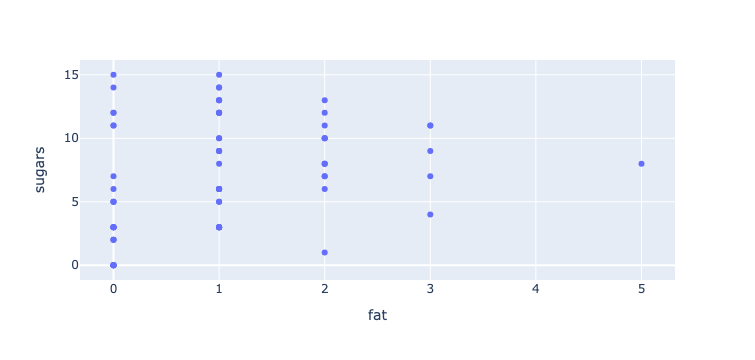

In [17]:
px.scatter(dataframe,x='fat',y='sugars')

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable><variable id="1m+6=s7NsBC*q3sFfiW%">dataframe</variable></variables><block type="varDoMethod" id="7PkTI5@+A6#C}J7CTmyF" x="0" y="0"><mutation items="3"></mutation><field name="VAR" id="+yh,Zg{hON]zy6D~.rH#">px</field><field name="MEMBER">scatter</field><data>px:scatter</data><value name="ADD0"><block type="variables_get" id="+5u=XIC-0Mj87=/ifBv["><field name="VAR" id="1m+6=s7NsBC*q3sFfiW%">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="LtVrpN-coFOhTc:miwq6"><field name="CODE">x='fat'</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="}5K8sF:0wxux#%hkL6pJ"><field name="CODE">y='sugars'</field></block></value></block></xml>

<details>
  <summary>Interpretation</summary>
  
That's a curious graph!
Notice first that although there are 70+ cereals, we're only seeing about 35 points.
That's because some cereals have the same values for sugar and fat, so they are plotted on top of each other - something to watch out for!

Overall it looks like as fat increases, sugar goes to the middle of the range, i.e. about 7, rather than going high with it.
</details>


## Do some manufacturers have more sugar in their cereals than others?

First, group by manufacturers (`mfr`).

In [55]:
groups = dataframe.groupby('mfr')

groups.mean(numeric_only=True)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="kvljy3ud{{GyqoMiju^J">groups</variable><variable id="1m+6=s7NsBC*q3sFfiW%">dataframe</variable></variables><block type="variables_set" id="}Aojc:Gq,l`Zaa-*_+nu" x="0" y="0"><field name="VAR" id="kvljy3ud{{GyqoMiju^J">groups</field><value name="VALUE"><block type="varDoMethod" id="7N0jg3hubfaIZAtm;0@d"><mutation items="1"></mutation><field name="VAR" id="1m+6=s7NsBC*q3sFfiW%">dataframe</field><field name="MEMBER">groupby</field><data>dataframe:groupby</data><value name="ADD0"><block type="text" id="8PPe92Ny#t%l|xwhHi_v"><field name="TEXT">mfr</field></block></value></block></value></block><block type="varDoMethod" id="`fP.Y+lhI~D+_$^[kr*8" x="33" y="134"><mutation items="1"></mutation><field name="VAR" id="kvljy3ud{{GyqoMiju^J">groups</field><field name="MEMBER">mean</field><data>groups:mean</data><value name="ADD0"><block type="dummyOutputCodeBlock" id="Ndcm|7UihaPHz)3Khl^@"><field name="CODE">numeric_only=True</field></block></value></block></xml>

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
mfr,,,,,,,,,,,,,
A,100.000000,4.000000,1.000000,0.000000,0.000000,16.000000,3.000000,95.000000,25.000000,2.000000,1.000000,1.000000,54.850917
G,111.363636,2.318182,1.363636,200.454545,1.272727,14.727273,7.954545,85.227273,35.227273,2.136364,1.049091,0.875000,34.485852
K,108.695652,2.652174,0.608696,174.782609,2.739130,15.130435,7.565217,103.043478,34.782609,2.347826,1.077826,0.796087,44.038462
N,86.666667,2.833333,0.166667,37.500000,4.000000,16.000000,1.833333,145.000000,8.333333,1.666667,0.971667,0.778333,67.968567
P,108.888889,2.444444,0.888889,146.111111,2.777778,13.222222,8.777778,113.888889,25.000000,2.444444,1.064444,0.714444,41.705744
Q,95.000000,2.625000,1.750000,92.500000,1.337500,11.571429,6.142857,74.375000,12.500000,2.375000,0.875000,0.823750,42.915990
R,115.000000,2.500000,1.250000,198.125000,1.875000,17.625000,6.125000,102.142857,25.000000,2.000000,1.000000,0.871250,41.542997


Now make a barplot with the means of these groups for `sugars`.

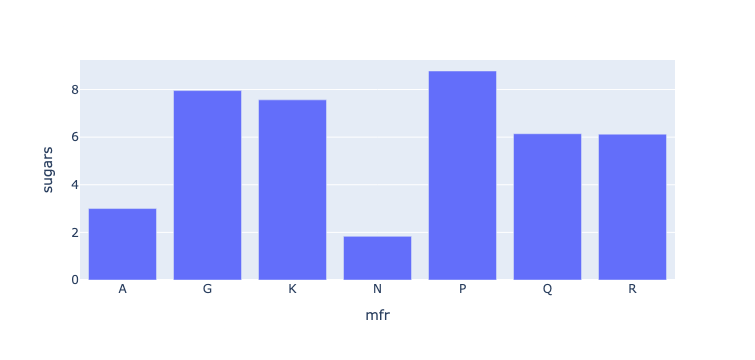

In [66]:
px.bar(groups.mean(numeric_only=True),y="sugars")

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable><variable id="kvljy3ud{{GyqoMiju^J">groups</variable></variables><block type="varDoMethod" id="7PkTI5@+A6#C}J7CTmyF" x="154" y="143"><mutation items="2"></mutation><field name="VAR" id="+yh,Zg{hON]zy6D~.rH#">px</field><field name="MEMBER">bar</field><data>px:bar</data><value name="ADD0"><block type="varDoMethod" id="D8hJ~sZ}G*S_.m8H4Lm)"><mutation items="1"></mutation><field name="VAR" id="kvljy3ud{{GyqoMiju^J">groups</field><field name="MEMBER">mean</field><data>groups:mean</data><value name="ADD0"><block type="dummyOutputCodeBlock" id="S72(JvqkcQ)6q_7Fw.*)"><field name="CODE">numeric_only=True</field></block></value></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="[E_+Hw=gVTJPO$^~e}Z$"><field name="CODE"> y="sugars"</field></block></value></block></xml>

<details>
  <summary>Interpretation</summary>
  
It certainly looks like some manufacturers specialize in low sugar, e.g. `American Home Food Products` and `Nabisco`.
</details>

## How do hot and cold cereals compare on healthy attributes like protein, fiber, and vitamins?

The first notebook made a line plot with the groups.
However, that would show **all** the variables, and this dataframe has too many for that.

So as a first step, create a new dataframe `healthy` with just the columns `type`,`protein`, `fiber`, `vitamins` in it, then display `healthy`.

*Hint: selecting columns was shown in the 'Nature of data' notebook*.

In [68]:
healthy = dataframe[['protein', 'fiber', 'vitamins', 'type']]

healthy

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="0O#9D6QT!8:zZfaersHo">healthy</variable><variable id="1m+6=s7NsBC*q3sFfiW%">dataframe</variable></variables><block type="variables_set" id="Pp36j_tRClcER(Wl`kf*" x="25" y="194"><field name="VAR" id="0O#9D6QT!8:zZfaersHo">healthy</field><value name="VALUE"><block type="indexer" id="G)%7AN/#CM!nZ49*+4jB"><field name="VAR" id="1m+6=s7NsBC*q3sFfiW%">dataframe</field><value name="INDEX"><block type="lists_create_with" id="[89k1,iojvsqw()]zT5f"><mutation items="4"></mutation><value name="ADD0"><block type="text" id="$8jH!gnmt6?BI)ahw7oe"><field name="TEXT">protein</field></block></value><value name="ADD1"><block type="text" id="Ppd|YmvEeHWQ)K{Yc0J."><field name="TEXT">fiber</field></block></value><value name="ADD2"><block type="text" id="kMemV@/4[|Gu?rv75E;x"><field name="TEXT">vitamins</field></block></value><value name="ADD3"><block type="text" id="]~V[DW2;r)~;#f7V.!}O"><field name="TEXT">type</field></block></value></block></value></block></value></block><block type="variables_get" id="ckq*EJ}AQxY#d::V:*G." x="25" y="325"><field name="VAR" id="0O#9D6QT!8:zZfaersHo">healthy</field></block></xml>

,protein,fiber,vitamins,type
0,4,10.0,25,C
1,3,2.0,0,C
2,4,9.0,25,C
3,4,14.0,25,C
4,2,1.0,25,C
...,...,...,...,...
72,2,0.0,25,C
73,1,0.0,25,C
74,3,3.0,25,C
75,3,3.0,25,C


Now group `healthy` by `type` and store in `healthy_groups`.

In [74]:
healthy_groups = healthy.groupby('type')

healthy_groups.mean()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="J(rC(w)3K0*@W+B.|)$m">healthy_groups</variable><variable id="0O#9D6QT!8:zZfaersHo">healthy</variable></variables><block type="variables_set" id="iC#fL95orH^/Rc:grEa:" x="0" y="0"><field name="VAR" id="J(rC(w)3K0*@W+B.|)$m">healthy_groups</field><value name="VALUE"><block type="varDoMethod" id="Ue@JD$CtEg_uHb9=gSf$"><mutation items="1"></mutation><field name="VAR" id="0O#9D6QT!8:zZfaersHo">healthy</field><field name="MEMBER">groupby</field><data>healthy:groupby</data><value name="ADD0"><block type="text" id="N|)%)*$`+%J!c4,5u%*R"><field name="TEXT">type</field></block></value></block></value></block><block type="varDoMethod" id="FL46`*[(r/Lk5i#jZKOJ" x="32" y="107"><mutation items="1"></mutation><field name="VAR" id="J(rC(w)3K0*@W+B.|)$m">healthy_groups</field><field name="MEMBER">mean</field><data>healthy_groups:mean</data></block></xml>

,protein,fiber,vitamins
type,,,
C,2.486486,2.189189,29.054054
H,4.000000,1.233333,8.333333


Now make the line plot using the mean of `healthy_groups`.

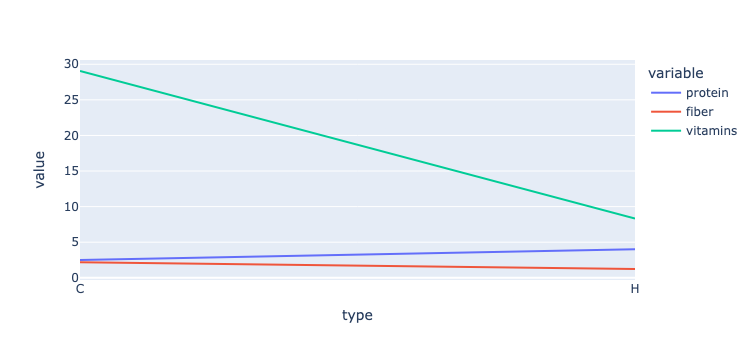

In [79]:
px.line(healthy_groups.mean())

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable><variable id="J(rC(w)3K0*@W+B.|)$m">healthy_groups</variable></variables><block type="varDoMethod" id="7PkTI5@+A6#C}J7CTmyF" x="0" y="0"><mutation items="1"></mutation><field name="VAR" id="+yh,Zg{hON]zy6D~.rH#">px</field><field name="MEMBER">line</field><data>px:line</data><value name="ADD0"><block type="varDoMethod" id="wn|1S@]V?-9-HAlO^4m3"><mutation items="1"></mutation><field name="VAR" id="J(rC(w)3K0*@W+B.|)$m">healthy_groups</field><field name="MEMBER">mean</field><data>healthy_groups:mean</data></block></value></block></xml>

<details>
  <summary>Interpretation</summary>
  
Again, very interesting - looks like cold cereals are being enriched with vitamins in a way hot cereals are not.
Hot cereals have a bit more protein but surprisingly less fiber.
</details>


## Is protein approximately normally distributed, or are their cereals with unusually high and low amounts of protein?

Make a histogram on `protein` using `dataframe`

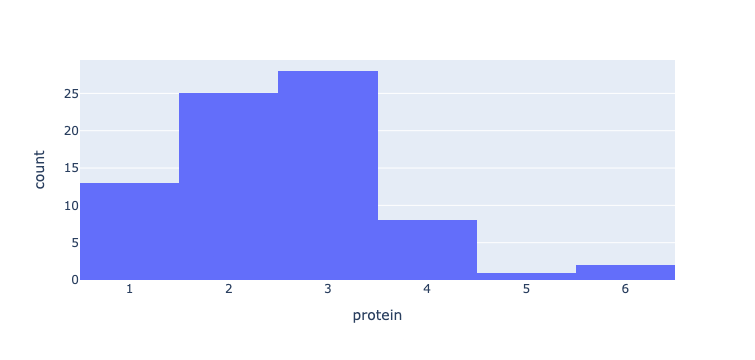

In [85]:
px.histogram(dataframe,x='protein')

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable><variable id="1m+6=s7NsBC*q3sFfiW%">dataframe</variable></variables><block type="varDoMethod" id="7PkTI5@+A6#C}J7CTmyF" x="0" y="0"><mutation items="2"></mutation><field name="VAR" id="+yh,Zg{hON]zy6D~.rH#">px</field><field name="MEMBER">histogram</field><data>px:histogram</data><value name="ADD0"><block type="variables_get" id="@5YzK0kubyXCwM.CO!(="><field name="VAR" id="1m+6=s7NsBC*q3sFfiW%">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="0UT`OgPlMp)UDnV|hC7-"><field name="CODE">x='protein'</field></block></value></block></xml>

<details>
  <summary>Interpretation</summary>
  
That certainly doesn't look normal.
It seems that protein is being manipulated somehow when the level is high.
</details>

<!--  -->